In [1]:
#pip install missingno


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import pygwalker as pyg

df = pd.read_excel("Olympic Athletes.xlsx").drop(["Closing Ceremony Date"], axis=1)
df

,Athlete,Age,Country,Year,Sport,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,United States,2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,Archery,0,0,1,1


In [3]:
df["Country"].value_counts().head(10)

United States    1109
Russia            706
Germany           552
Australia         524
China             450
Canada            351
Italy             307
Great Britain     296
France            287
Netherlands       286
Name: Country, dtype: int64

In [4]:
df.groupby(by=['Country']).sum()[['Total Medals']].sort_values(by=['Total Medals'],ascending=False)

,Total Medals
Country,
United States,1312
Russia,768
Germany,629
Australia,609
China,530
...,...
Guatemala,1
Syria,1
Macedonia,1


In [5]:
df['Athlete'].value_counts().head(30)

Matt Wells                 4
Jason Lezak                4
Sergey Tetyukhin           4
Leisel Jones               4
Artur Taymazov             4
Katalin Kovács             4
Veronica Campbell-Brown    4
Lucha Aymar                4
Pavol Hochschorner         4
Peter Hochschorner         4
Wang Hao                   4
Lauren Jackson             4
Michal Martikán            4
Kristi Harrower            4
Anky van Grunsven          4
Valentina Vezzali          4
Katrin Wagner-Augustin     4
Christie Pearce-Rampone    4
Kim Rhode                  4
Ben Ainslie                4
Bradley Wiggins            4
Yang Wei                   4
Chris Hoy                  4
Emilie Heymans             4
Heather Petri              4
Robert Scheidt             4
Brenda Villa               4
Eskild Ebbesen             4
Katherine Grainger         4
Elena Georgescu            3
Name: Athlete, dtype: int64

<AxesSubplot:>

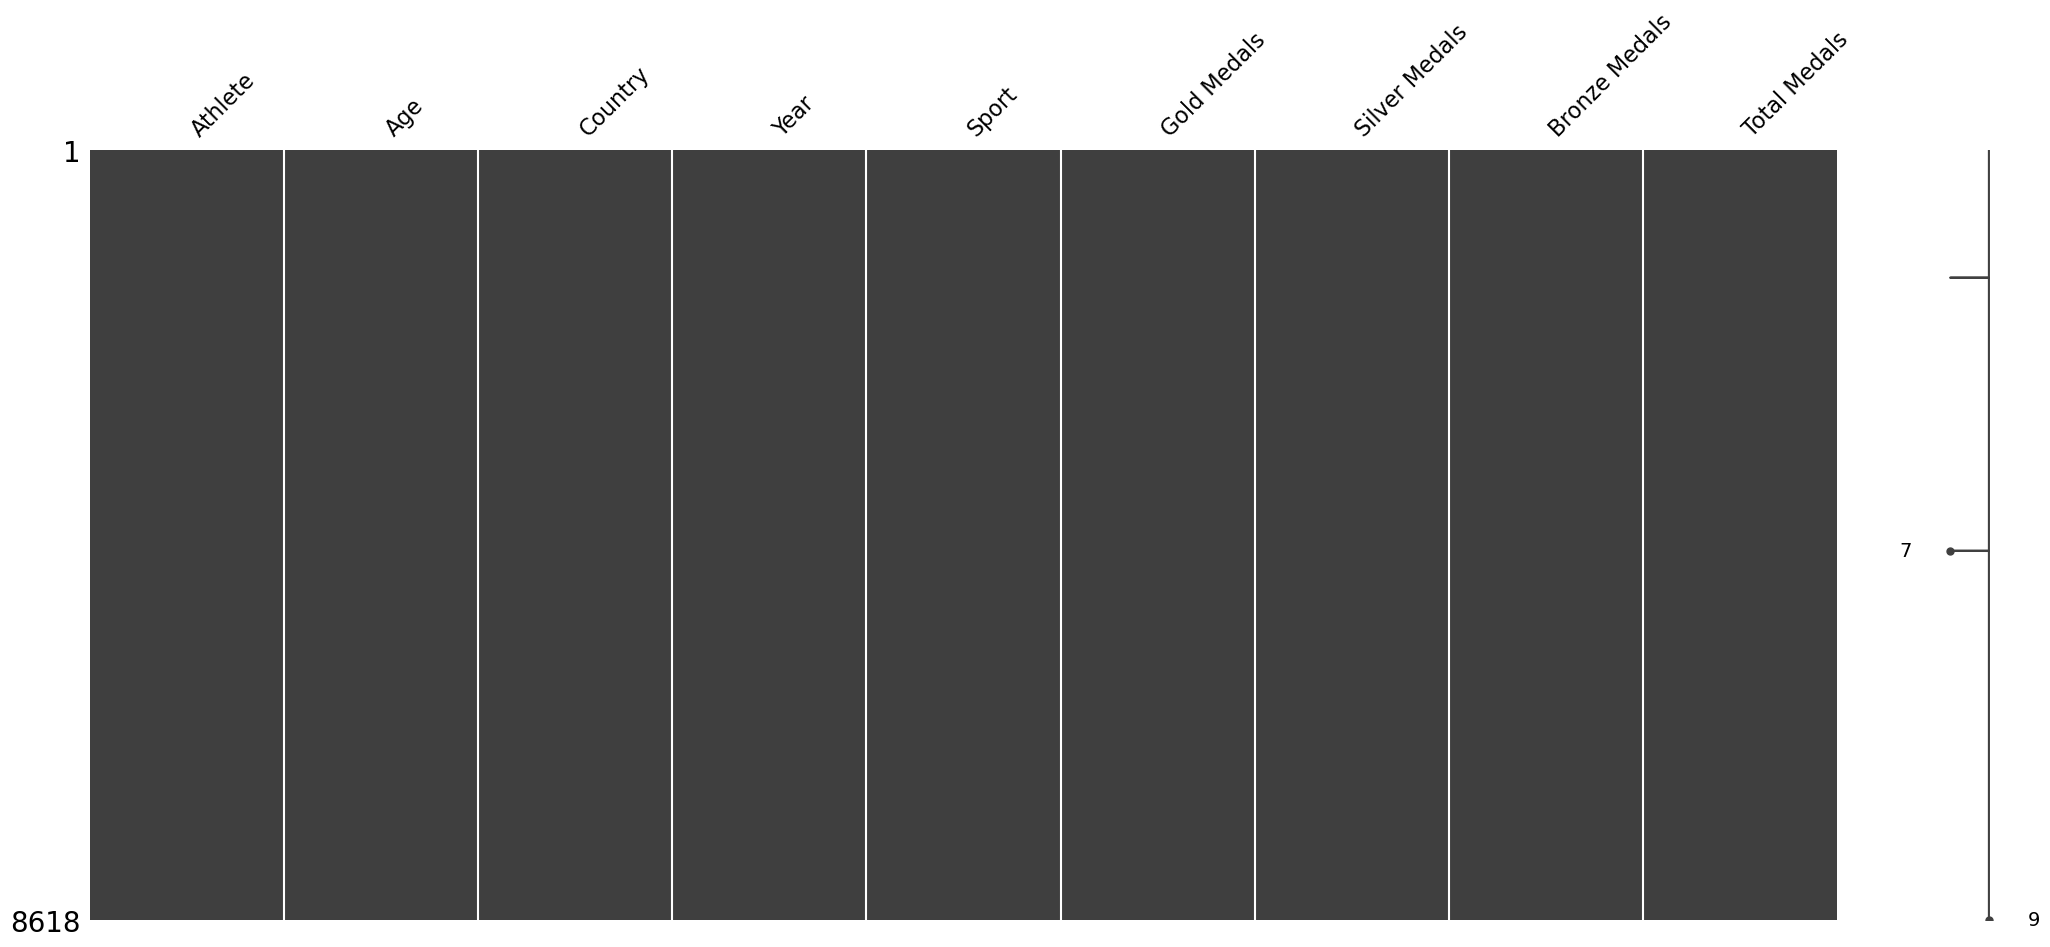

In [6]:
msno.matrix(df)

In [7]:
df.isnull().sum()

Athlete          5
Age              5
Country          0
Year             0
Sport            0
Gold Medals      0
Silver Medals    0
Bronze Medals    0
Total Medals     0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df

,Athlete,Age,Country,Year,Sport,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,United States,2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,Archery,0,0,1,1


In [10]:
df.groupby(by=['Country']).sum()[['Gold Medals','Silver Medals','Bronze Medals']].sort_values(by=['Gold Medals'],ascending=False)

,Gold Medals,Silver Medals,Bronze Medals
Country,,,
United States,552,440,320
Russia,234,221,313
China,234,156,140
Germany,223,183,223
Canada,168,98,104
...,...,...,...
Montenegro,0,14,0
Paraguay,0,17,0
Puerto Rico,0,1,1


In [11]:
df.groupby(by=['Year']).sum()[['Total Medals']].sort_values(by=['Total Medals'],ascending=False)

,Total Medals
Year,
2008,2050
2000,2005
2004,2004
2012,1941
2006,526
2010,520
2002,478


In [12]:
df['Sport'].nunique() # nombres de sport 

49

In [13]:
df['Country'].nunique() #nombres de pays qui ont participes

110

In [14]:
a=df.groupby(by=['Country']).sum()[['Gold Medals','Silver Medals','Bronze Medals','Total Medals']].sort_values(by=['Gold Medals'],ascending=False)

a.index

Index(['United States', 'Russia', 'China', 'Germany', 'Canada', 'Australia',
       'Great Britain', 'South Korea', 'France', 'Netherlands',
       ...
       'Kyrgyzstan', 'Macedonia', 'Malaysia', 'Mauritius', 'Moldova',
       'Montenegro', 'Paraguay', 'Puerto Rico', 'Qatar', 'Kuwait'],
      dtype='object', name='Country', length=110)

In [15]:
medaille_par_annee=df.groupby(by=['Year']).sum()[['Gold Medals','Silver Medals','Bronze Medals','Total Medals']].sort_values(by=['Gold Medals'],ascending=False)
medaille_par_annee

,Gold Medals,Silver Medals,Bronze Medals,Total Medals
Year,,,,
2008,671,668,711,2050
2004,665,661,678,2004
2000,663,661,681,2005
2012,632,629,680,1941
2006,176,175,175,526
2010,174,175,171,520
2002,162,157,159,478


In [16]:
df.groupby(by=['Sport']).sum()[['Total Medals']].sort_values(by=['Total Medals'],ascending=False)

,Total Medals
Sport,
Swimming,765
Athletics,753
Rowing,576
Football,407
Hockey,386
Ice Hockey,384
Handball,351
Canoeing,333
Waterpolo,306


In [17]:
df['Gold Medals'].sum()

3143

In [18]:
df["Country"].unique()

array(['United States', 'Russia', 'Australia', 'Canada', 'Norway',
       'China', 'Zimbabwe', 'Netherlands', 'South Korea', 'Croatia',
       'France', 'Japan', 'Hungary', 'Germany', 'Poland', 'South Africa',
       'Sweden', 'Ukraine', 'Italy', 'Czech Republic', 'Austria',
       'Finland', 'Romania', 'Great Britain', 'Jamaica', 'Singapore',
       'Belarus', 'Chile', 'Spain', 'Tunisia', 'Brazil', 'Slovakia',
       'Costa Rica', 'Bulgaria', 'Switzerland', 'New Zealand', 'Estonia',
       'Kenya', 'Ethiopia', 'Trinidad and Tobago', 'Turkey', 'Morocco',
       'Bahamas', 'Slovenia', 'Armenia', 'Azerbaijan', 'India',
       'Puerto Rico', 'Egypt', 'Kazakhstan', 'Iran', 'Georgia',
       'Lithuania', 'Cuba', 'Colombia', 'Mongolia', 'Uzbekistan',
       'North Korea', 'Tajikistan', 'Kyrgyzstan', 'Greece', 'Macedonia',
       'Moldova', 'Chinese Taipei', 'Indonesia', 'Thailand', 'Vietnam',
       'Latvia', 'Venezuela', 'Mexico', 'Nigeria', 'Qatar', 'Serbia',
       'Serbia and Montenegro'

In [19]:
 a=df.groupby(by=['Sport']).sum()[['Total Medals']].sort_values(by=['Total Medals'])
print(a.index)

Index(['Skeleton', 'Triathlon', 'Trampoline', 'Modern Pentathlon', 'Luge',
       'Freestyle Skiing', 'Beach Volleyball', 'Snowboarding',
       'Nordic Combined', 'Ski Jumping', 'Figure Skating', 'Bobsleigh',
       'Tennis', 'Curling', 'Table Tennis', 'Rhythmic Gymnastics',
       'Alpine Skiing', 'Badminton', 'Archery', 'Taekwondo',
       'Synchronized Swimming', 'Softball', 'Biathlon',
       'Short-Track Speed Skating', 'Speed Skating', 'Diving',
       'Cross Country Skiing', 'Weightlifting', 'Equestrian', 'Boxing',
       'Shooting', 'Sailing', 'Baseball', 'Judo', 'Wrestling', 'Fencing',
       'Volleyball', 'Gymnastics', 'Basketball', 'Cycling', 'Waterpolo',
       'Canoeing', 'Handball', 'Ice Hockey', 'Hockey', 'Football', 'Rowing',
       'Athletics', 'Swimming'],
      dtype='object', name='Sport')


In [20]:
df['Sport'].value_counts()

Athletics                    687
Rowing                       567
Swimming                     487
Football                     407
Hockey                       386
Ice Hockey                   384
Handball                     351
Waterpolo                    306
Canoeing                     295
Basketball                   287
Volleyball                   278
Cycling                      261
Wrestling                    245
Fencing                      230
Judo                         224
Baseball                     216
Sailing                      210
Gymnastics                   194
Boxing                       188
Shooting                     181
Weightlifting                180
Equestrian                   157
Softball                     134
Cross Country Skiing         128
Diving                       113
Taekwondo                    112
Synchronized Swimming        109
Speed Skating                103
Short-Track Speed Skating     96
Biathlon                      94
Badminton 

In [21]:
m=df.groupby(by=['Country']).sum()[['Total Medals']]
m['Total Medals'].idxmax()

'United States'

In [22]:
sports_by_year =df.pivot_table(index='Year', columns='Sport', values='Total Medals', aggfunc='count', fill_value=0)


In [23]:
df.groupby(by=['Age']).sum()[['Total Medals']]

,Total Medals
Age,
15.0,23
16.0,80
17.0,104
18.0,155
19.0,252
20.0,382
21.0,520
22.0,720
23.0,757


In [24]:
age_bins = [10, 25, 35, 45, 55, 65]
age_labels = ['15-25', '26-35', '36-45', '46-55', '56-65']
df.loc[df['Age'],'Age Groupe'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df

C:\Users\ibras\AppData\Local\Temp\ipykernel_13132\3875689105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Age'],'Age Groupe'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


,Athlete,Age,Country,Year,Sport,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Age Groupe
0,Michael Phelps,23.0,United States,2008,Swimming,8,0,0,8,15-25
1,Michael Phelps,19.0,United States,2004,Swimming,6,0,2,8,15-25
2,Michael Phelps,27.0,United States,2012,Swimming,4,2,0,6,15-25
3,Natalie Coughlin,25.0,United States,2008,Swimming,1,2,3,6,15-25
4,Aleksey Nemov,24.0,Russia,2000,Gymnastics,2,1,3,6,15-25
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,Archery,0,1,0,1,26-35
8614,Kateryna Serdiuk,17.0,Ukraine,2000,Archery,0,1,0,1,15-25
8615,Wietse van Alten,21.0,Netherlands,2000,Archery,0,0,1,1,26-35
8616,Sandra Wagner-Sachse,31.0,Germany,2000,Archery,0,0,1,1,15-25


In [32]:
df.groupby(by=['Age Groupe']).sum()[['Silver Medals','Bronze Medals']]

,Silver Medals,Bronze Medals
Age Groupe,,
15-25,1631,1608
26-35,1495,1647
36-45,0,0
46-55,0,0
56-65,0,0


In [83]:
 df.groupby(by=['Athlete']).sum()[['Gold Medals','Silver Medals','Bronze Medals','Total Medals']].sort_values(by=['Gold Medals'],ascending=False)

   

['Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals']